# **Customer Segmentation Using RFM Analysis**

## **Preamble**

This Jupyter Notebook presents a comprehensive approach to customer segmentation using RFM (Recency, frequency, Monetary) analysis. RFM analysis is a powerful method for understanding customer behavior and categorizing customers based on how recently, how often, and how much they spend. By applying RFM analysis, businesses can gain valuable insights into their customer base, enabling them to tailor marketing strategies, improve customer retention, and increase overall profitability.

### **Objectives**
- **Data Preparation**: Clean and prepare the data for analysis, ensuring that all necessary customer-related features are available and ready for segmentation.
- **RFM Feature Calculation**: Calculate the RFM values for each customer, which involves determining the recency of their last purchase, the frequency of their purchases, and the total monetary value of their transactions.
- **Customer Segmentation**: Segment customers into distinct groups based on their RFM scores. This notebook explores two common approaches: percentile-based segmentation and clustering-based segmentation.
- **Business Insights**: Interpret the resulting customer segments, providing actionable insights that can be used to inform marketing strategies, customer retention efforts, and personalized offers.
- **Visualization**: Visualize the distribution of RFM scores and the resulting customer segments to better understand the underlying patterns in customer behavior.

### **Tools and Techniques**
- **Pandas** for data manipulation and preparation.
- **Scikit-learn** for implementing clustering algorithms if clustering-based segmentation is chosen.
- **Matplotlib/Seaborn** for data visualization and exploratory data analysis (EDA).

### **Expected Outcomes**
By the end of this analysis, you will have a clear understanding of your customer base, categorized into meaningful segments based on their RFM scores. These segments will provide insights into which customers are most valuable, which are at risk of churning, and how best to target each group with tailored marketing strategies.



In [1]:
# import libraries beforehand
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing
RFM Analysis requires features that represents (or at least implies the existence of) Recency, Frequency, and Monetary value of a customer. _Recency_ can be determined by looking at the date of the last order placed by a customer and subtracting it from the last order placed globally. The _frequency_ of orders can be determined by the number of orders placed by each customer, in this case with how many order IDs attributed to each customer. The _monetary_ value is obtained by the total amount of expenditure spent by each customer for all purchases each of them made. <br><br>
For that, the attributes available to use now are:
- `order_purchase_timestamp` in `orders_dataset.csv`, self-explanatory.
- `price` and `freight_value` in `order_items_dataset.csv` that together contribute to customer's expenditure.
- `order_item_id` in `order_items_dataset.csv` which indirectly indicates the number of items purchased in one order.
- `order_id` and `customer_id` in `orders_dataset.csv`, as well as `customer_id` and `customer_unique_id` in `customers_dataset.csv` which will be used to determine the frequency of orders made by each customer.

---
Hence, in this particular case, we will need 2 datasets to be involved, namely `order_items_dataset.csv`, `orders_dataset.csv` and `customers_dataset.csv`.

### Obtain The Data

In [2]:
# get the datasets
orders = pd.read_csv('./datasets/orders_dataset.csv')
order_items = pd.read_csv('./datasets/order_items_dataset.csv')
customers = pd.read_csv('./datasets/customers_dataset.csv')

In [3]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


We can see from orders dataframe, that it has several datetime-typed columns. Since there are no official description for each column, we will have to rely on educated assumption based on its name. <br>
- `order_id`: ID of order.
- `customer_id`: ID of customer.
- `order_status`: Current process the order is going through.
- `order_purchase_timestamp`: The date and time an order is made and paid.
- `order_approved_at`: The date and time an order is accepted by the store.
- `order_delivered_carrier_date`: The date and time the item started to be delivered by carrier.
- `order_delivered_customer_date`: The date and time the item received by the buyer.
- `order_estimated_delivery_date`: The estimated time an item will arrive to the buyer.

In [4]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


We will describe each of order_items dataframe column based on educated assumption as well. <br>
- `order_id`: ID of order.
- `order_item_id`: ID of each item purchased in an order.
- `product_id`: ID of product purchased.
- `seller_id`: ID of seller.
- `shipping_limit_date`: The latest date an order has to be shipped.
- `price`: Price of item purchased.
- `freight_value`: Cost of delivery.

In [5]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


- `customer_id`: ID of customer in regards to each order.
- `customer_unique_id`: ID to represent each unique customer.
- `customer_zip_code_prefix`: ZIP code of customer.
- `customer_city`: Customer's city of origin.
- `customer_state`: Customer's state of origin.

### Data Info

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [7]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Fortunately for order_items dataframe, it doesn't have missing values.

In [8]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


### Change Dtype to Datetime
Since we only interested in `order_purchase_timestamp`, we are only going to change it alone and none else.

In [9]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 6.1+ MB


### Handling Missing Values

In [11]:
# `order_approved_at` missing values
oaa_missing = orders[orders.order_approved_at.isna()]
oaa_missing

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [12]:
oaa_missing.order_status.value_counts()

order_status
canceled     141
delivered     14
created        5
Name: count, dtype: int64

From this point we get the insight that rows having a missing `order_approved_at` attribute is mostly canceled orders, then delivered orders (which is odd) and newly created orders.

In [13]:
# `order_delivery_carrier_date` missing values
odcd_missing = orders[orders.order_delivered_carrier_date.isna()]
odcd_missing

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaN,NaN,2016-12-09 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [14]:
odcd_missing.order_status.value_counts()

order_status
unavailable    609
canceled       550
invoiced       314
processing     301
created          5
approved         2
delivered        2
Name: count, dtype: int64

In [15]:
# `order_delivery_customer_date` missing values
odcud_missing = orders[orders.order_delivered_customer_date.isna()]
odcud_missing

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [16]:
odcud_missing.order_status.value_counts()

order_status
shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: count, dtype: int64

From `order_delivered_carrier_date` and `order_delivered_customer_date` missing values we can also conclude that, for most of them, their missing values did not miss for no reason (Missing Not At Random; MNAR). It was because the orders are still going through some processes (apart from those delivered orders yet having missing values in said columns, which may be a peculiarity). <br>
To ensure that only orders with actual monetary value are included in the data set, we must limit our analysis to completed orders. This approach ensures that only transactions that have been fully processed and contributed to the company's profits are considered.

---
Hence we will not handle the missing values per se, instead we will filter the `order_status`.

### Filtering Out Incomplete Transactions

In [17]:
orders.order_status.value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

Assuming the complete transaction achieved when `order_status` valued 'delivered', we will filter out rows with `order_status` other than 'delivered'.

In [18]:
orders = orders[orders.order_status == 'delivered']
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [19]:
orders.order_status.value_counts()

order_status
delivered    96478
Name: count, dtype: int64

👍

In [20]:
# TODO:
# 1. EDA both dataset, ensure value is OK, outliers kayanya include aja (tanya chatGPT kalo mau)
# 2. Bikin dataframe isinya customer id, recency, frequency, sama monetary
# 3. Clustering buat nentuin boundary
# refer ke sini (https://medium.com/capillary-data-science/rfm-analysis-an-effective-customer-segmentation-technique-using-python-58804480d232)
# 4. pasang label buat masing2 customer berdasarkan clustering
# 5. bikin predictive model

## Making the RFM Dataframe
In total, the column we need are: 
- Customer Unique ID 
- The number of days between customer's last transaction date and the overall last transaction date in the dataset
- The count of customer unique ID appearance in customers dataset
- Sum of all order expenditure (no. of items * (price + freight value))

We will filter out the columns that are irrelevant to this analysis.

In [21]:
orders_rfm = orders[['order_id', 'customer_id', 'order_purchase_timestamp']]
order_items_rfm = order_items[['order_id', 'order_item_id', 'price', 'freight_value']]
customers_rfm = customers[['customer_id', 'customer_unique_id']]

In [22]:
orders_rfm.head()

,order_id,customer_id,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39


In [23]:
order_items_rfm.head()

,order_id,order_item_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,199.90,18.14


In [24]:
customers_rfm.head()

,customer_id,customer_unique_id
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066


#### Summing Up All Order Items Into One

In [25]:
order_items_rfm['cost'] = order_items_rfm['price'] + order_items_rfm['freight_value']
order_items_rfm.head()

/tmp/ipykernel_575/2001147843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_items_rfm['cost'] = order_items_rfm['price'] + order_items_rfm['freight_value']


,order_id,order_item_id,price,freight_value,cost
0,00010242fe8c5a6d1ba2dd792cb16214,1,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,199.90,18.14,218.04


In [26]:
order_items_rfm = order_items_rfm[['order_id', 'order_item_id', 'cost']]
item_group = order_items_rfm.groupby('order_id').aggregate({
    'order_item_id': 'max',
    'cost': 'sum'
}).rename(columns={'order_item_id': 'n_items', 'cost': 'cost_sum'}).reset_index()

In [27]:
item_group

,order_id,n_items,cost_sum
0,00010242fe8c5a6d1ba2dd792cb16214,1,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,259.83
2,000229ec398224ef6ca0657da4fc703e,1,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,218.04
...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,1,343.40
98662,fffcd46ef2263f404302a634eb57f7eb,1,386.53
98663,fffce4705a9662cd70adb13d4a31832d,1,116.85
98664,fffe18544ffabc95dfada21779c9644f,1,64.71


#### Join Orders and Customers dataset

In [28]:
cust_order = customers_rfm.join(orders_rfm.set_index('customer_id'), on='customer_id', how='inner')

In [29]:
cust_order

,customer_id,customer_unique_id,order_id,order_purchase_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30
...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,6760e20addcf0121e9d58f2f1ff14298,2018-04-07 15:48:17
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-04 08:20:22
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,fed4434add09a6f332ea398efd656a5c,2018-04-08 20:11:50
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,e31ec91cea1ecf97797787471f98a8c2,2017-11-03 21:08:33


#### Join `cust_order` with `item_group` dataset

In [30]:
prep_data = cust_order.join(item_group.set_index('order_id'), on='order_id', how='inner')

In [31]:
prep_data

,customer_id,customer_unique_id,order_id,order_purchase_timestamp,n_items,cost_sum
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,1,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,1,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,1,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,1,252.25
...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,6760e20addcf0121e9d58f2f1ff14298,2018-04-07 15:48:17,1,88.78
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-04 08:20:22,1,129.06
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,fed4434add09a6f332ea398efd656a5c,2018-04-08 20:11:50,1,56.04
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,e31ec91cea1ecf97797787471f98a8c2,2017-11-03 21:08:33,1,711.07


**Find the overall last transaction date** <br>
We will use `order_purchase_timestamp` column from orders dataset.

In [32]:
max_date = orders.order_purchase_timestamp.max()
max_date

Timestamp('2018-08-29 15:00:37')

In [33]:
prep_data.loc[:,'diff_date'] = prep_data.order_purchase_timestamp.apply(lambda x: max_date - x).dt.days

In [34]:
prep_data

,customer_id,customer_unique_id,order_id,order_purchase_timestamp,n_items,cost_sum,diff_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1,146.87,469
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,1,335.48,228
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,1,157.73,101
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,1,173.30,168
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,1,252.25,31
...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,6760e20addcf0121e9d58f2f1ff14298,2018-04-07 15:48:17,1,88.78,143
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-04 08:20:22,1,129.06,147
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,fed4434add09a6f332ea398efd656a5c,2018-04-08 20:11:50,1,56.04,142
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,e31ec91cea1ecf97797787471f98a8c2,2017-11-03 21:08:33,1,711.07,298


Workaround for making frequency column.

In [35]:
prep_data['frequency'] = 1

In [36]:
prep_data

,customer_id,customer_unique_id,order_id,order_purchase_timestamp,n_items,cost_sum,diff_date,frequency
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1,146.87,469,1
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,1,335.48,228,1
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,1,157.73,101,1
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,1,173.30,168,1
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,1,252.25,31,1
...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,6760e20addcf0121e9d58f2f1ff14298,2018-04-07 15:48:17,1,88.78,143,1
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-04 08:20:22,1,129.06,147,1
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,fed4434add09a6f332ea398efd656a5c,2018-04-08 20:11:50,1,56.04,142,1
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,e31ec91cea1ecf97797787471f98a8c2,2017-11-03 21:08:33,1,711.07,298,1


In [37]:
rfm_df = prep_data.groupby('customer_unique_id').aggregate({
    'diff_date': 'min',
    'frequency': 'sum',
    'cost_sum': 'sum'
}).rename(columns={
    'diff_date': 'recency',
    'cost_sum': 'monetary'
}).reset_index(names='cust_id')

In [38]:
rfm_df

,cust_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
2,0000f46a3911fa3c0805444483337064,536,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89
...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,446,1,2067.42
93354,fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58
93355,ffff371b4d645b6ecea244b27531430a,567,1,112.46
93356,ffff5962728ec6157033ef9805bacc48,118,1,133.69


## Customer Segmentation Using KMeans

### Determining No. of Cluster

/tmp/ipykernel_575/2501514172.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tx_recency.loc[:,"clusters"] = kmeans.labels_


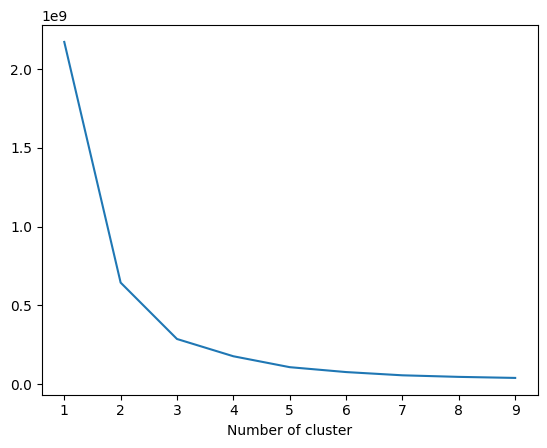

In [39]:
from sklearn.cluster import KMeans

sse={}
tx_recency = rfm_df[['recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency.loc[:,"clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

### Assigning Cluster

In [40]:
#### Function for ordering clusters
def order_cluster(cluster_field_name, target_field_name, df, ascending):
    new_cluster_field_name = 'new_'+cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name, ascending = ascending).reset_index(drop=True)
    df_new['index']=df_new.index
    df_final = pd.merge(df, df_new[[cluster_field_name, 'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name], axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [41]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(rfm_df[['recency']])
rfm_df['recency_cluster']=kmeans.predict(rfm_df[['recency']])
rfm_df = order_cluster('recency_cluster','recency', rfm_df, False)

In [42]:
rfm_df

,cust_id,recency,frequency,monetary,recency_cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,2
2,0000f46a3911fa3c0805444483337064,536,1,86.22,0
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,1
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,1
...,...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,446,1,2067.42,0
93354,fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58,1
93355,ffff371b4d645b6ecea244b27531430a,567,1,112.46,0
93356,ffff5962728ec6157033ef9805bacc48,118,1,133.69,2


In [43]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(rfm_df[['frequency']])
rfm_df['frequency_cluster']=kmeans.predict(rfm_df[['frequency']])
rfm_df = order_cluster('frequency_cluster','frequency', rfm_df, True)

In [44]:
rfm_df

,cust_id,recency,frequency,monetary,recency_cluster,frequency_cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,2,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,2,0
2,0000f46a3911fa3c0805444483337064,536,1,86.22,0,0
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,1,0
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,1,0
...,...,...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,446,1,2067.42,0,0
93354,fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58,1,0
93355,ffff371b4d645b6ecea244b27531430a,567,1,112.46,0,0
93356,ffff5962728ec6157033ef9805bacc48,118,1,133.69,2,0


In [45]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(rfm_df[['monetary']])
rfm_df['monetary_cluster']=kmeans.predict(rfm_df[['monetary']])
rfm_df = order_cluster('monetary_cluster','monetary', rfm_df, True)

In [46]:
rfm_df

,cust_id,recency,frequency,monetary,recency_cluster,frequency_cluster,monetary_cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,2,0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,2,0,0
2,0000f46a3911fa3c0805444483337064,536,1,86.22,0,0,0
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,1,0,0
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,1,0,0
...,...,...,...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,446,1,2067.42,0,0,2
93354,fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58,1,0,0
93355,ffff371b4d645b6ecea244b27531430a,567,1,112.46,0,0,0
93356,ffff5962728ec6157033ef9805bacc48,118,1,133.69,2,0,0


### Visualization

In [47]:
# Define a function to map the values 
def set_value(row_number, assigned_value): 
    return assigned_value[row_number] 
  
# Creating recency Custer Tag Column
c=rfm_df.groupby('recency_cluster')['recency'].agg(['min','max','mean']).reset_index()
r1='<='+str(c.iloc[2,2]) 
r2=str(c.iloc[1,1])+' to '+str(c.iloc[1,2]) 
r3='>='+str(c.iloc[0,1])
# Create the dictionary 
R ={0 : r3, 1 : r2, 2 : r1} 
rfm_df['recency_cluster_tag']=rfm_df['recency_cluster'].apply(set_value, args =(R, )) 

# Creating frequency Custer Tag Column
a=rfm_df.groupby('frequency_cluster')['frequency'].agg(['min','max','mean']).reset_index()
f1='<='+str(a.iloc[0,2]) 
f2=str(a.iloc[1,1])+' to '+str(a.iloc[1,2]) 
f3='>='+str(a.iloc[2,1])
# Create the dictionary 
F ={0 : f1, 1 : f2, 2 :f3} 
rfm_df['frequency_cluster_tag']=rfm_df['frequency_cluster'].apply(set_value, args =(F, )) 

# Creating Monetary Custer Tag Column
b=rfm_df.groupby('monetary_cluster')['monetary'].agg(['min','max','mean']).reset_index()
m1='<='+str(int(round(b.iloc[0,2]))) 
m2=str(int(round(b.iloc[0,2])+1))+' to '+str(int(round(b.iloc[1,2]))) 
m3='>='+str(int(round(b.iloc[1,2])+1))
# Create the dictionary 
M ={0 : m1, 1 : m2, 2 :m3} 
rfm_df['monetary_cluster_tag']=rfm_df['monetary_cluster'].apply(set_value, args =(M, )) 

rfm_df["frequency_cluster_tag"] = rfm_df["frequency_cluster_tag"].astype(pd.api.types.CategoricalDtype(categories=[f1, f2, f3]))
rfm_df["monetary_cluster_tag"] = rfm_df["monetary_cluster_tag"].astype(pd.api.types.CategoricalDtype(categories=[m1, m2,m3]))
rfm_df["recency_cluster_tag"] = rfm_df["recency_cluster_tag"].astype(pd.api.types.CategoricalDtype(categories=[r1, r2,r3]))

In [48]:
rfm_df

,cust_id,recency,frequency,monetary,recency_cluster,frequency_cluster,monetary_cluster,recency_cluster_tag,frequency_cluster_tag,monetary_cluster_tag
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,2,0,0,<=168,<=1,<=301
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,2,0,0,<=168,<=1,<=301
2,0000f46a3911fa3c0805444483337064,536,1,86.22,0,0,0,>=354,<=1,<=301
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,1,0,0,169 to 353,<=1,<=301
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,1,0,0,169 to 353,<=1,<=301
...,...,...,...,...,...,...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,446,1,2067.42,0,0,2,>=354,<=1,>=1103
93354,fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58,1,0,0,169 to 353,<=1,<=301
93355,ffff371b4d645b6ecea244b27531430a,567,1,112.46,0,0,0,>=354,<=1,<=301
93356,ffff5962728ec6157033ef9805bacc48,118,1,133.69,2,0,0,<=168,<=1,<=301


Text(0.5, 0, 'Monetary Cluster')

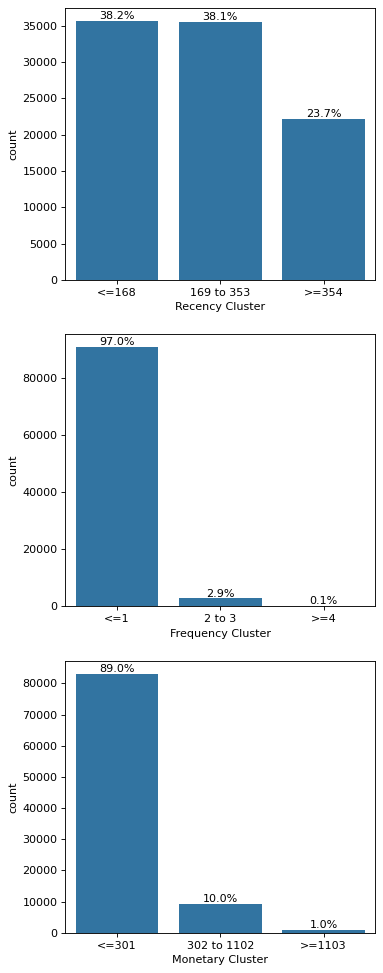

In [49]:
fig, ax = plt.subplots(3, 1, figsize=(5, 4), dpi=80)
plt.subplots_adjust(top = 3)

total = rfm_df.shape[0]
percentage = lambda x: f'{(x/total)*100:0.1f}%'

c1 = sns.countplot(data=rfm_df, x='recency_cluster_tag', ax=ax[0])
c1.bar_label(c1.containers[0], fmt=percentage)
c1.set_xlabel('Recency Cluster')
c2 = sns.countplot(data=rfm_df, x='frequency_cluster_tag', ax=ax[1])
c2.bar_label(c2.containers[0], fmt=percentage)
c2.set_xlabel('Frequency Cluster')
c3 = sns.countplot(data=rfm_df, x='monetary_cluster_tag', ax=ax[2])
c3.bar_label(c3.containers[0], fmt=percentage)
c3.set_xlabel('Monetary Cluster')

### Divide Into Segments

1. Core Customers <br>
RFM Score: 222 <br>
Who They Are: Highly engaged customers who have bought the most recent, the most often, and generated the most revenue.
2. Loyalist <br>
RFM Score: [1-2]2X <br>
Who They Are: Customers who make orders most often.
3. Potential <br>
RFM Score: [1-2]1[1-2] <br>
Who They Are: Customers who consistently, but not often, make orders with good amount of spending.
4. New Customers <br>
RFM Score: 20X <br>
Who They Are: First time customers.
5. At Risk <br>
RFM Score: 0[1-2]X <br>
Who They Are: Customers who used to frequently make order but haven't made any transaction recently
6. Hibernating <br>
RFM Score: 00X <br>
Who They Are: Customers who haven't made any order for a long time.
7. Regular <br>
RFM Score: Remaining Scores <br>
Who They Are: Customer who have average metrics across each RFM scores.


In [50]:
cust_segment = rfm_df.drop(columns=['recency_cluster_tag', 'frequency_cluster_tag', 'monetary_cluster_tag'])
cust_segment

,cust_id,recency,frequency,monetary,recency_cluster,frequency_cluster,monetary_cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,2,0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,2,0,0
2,0000f46a3911fa3c0805444483337064,536,1,86.22,0,0,0
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,1,0,0
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,1,0,0
...,...,...,...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,446,1,2067.42,0,0,2
93354,fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58,1,0,0
93355,ffff371b4d645b6ecea244b27531430a,567,1,112.46,0,0,0
93356,ffff5962728ec6157033ef9805bacc48,118,1,133.69,2,0,0


In [51]:
def segment(r, f, m):
    if r == f == m == 2:
        return "Core Customers"
    if r == f == 0:
        return "Hibernating"
    if r == 2 and f == 0:
        return "New Customers"
    if (r == 1 or r == 2) and f == 2:
        return "Loyalist"
    if r == 0 and (f == 1 or f == 2):
        return "At Risk"
    if (r == 1 or r == 2) and f == 1 and (m == 1 or m == 2):
        return "Potential"
    return "Regular"

In [52]:
cust_segment['segment'] = cust_segment.apply(lambda x: segment(x.recency_cluster, x.frequency_cluster, x.monetary_cluster), axis=1)

In [53]:
cust_segment.segment.value_counts()

segment
Regular           35927
New Customers     34522
Hibernating       21574
Potential           747
At Risk             545
Loyalist             38
Core Customers        5
Name: count, dtype: int64

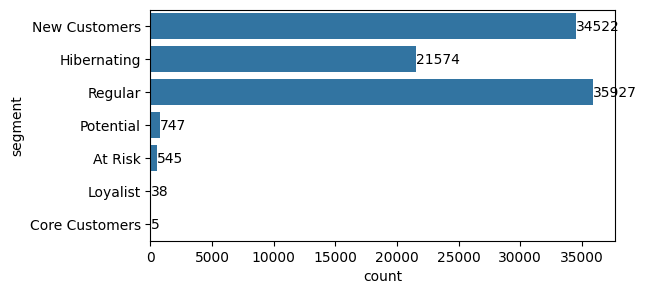

In [54]:
fig, ax = plt.subplots(1,1,figsize=(6,3))

cs = sns.countplot(y=cust_segment.segment)
_ = cs.bar_label(cs.containers[0])

## Develop Model to Predict Customer Segment
The next step is to create a machine learning predictive model. Its purpose is to identify customer segments based on recency, frequency, and monetary scores, without relying on cluster information. To achieve this, we will remove the cluster columns.

In [55]:
cust_segment

,cust_id,recency,frequency,monetary,recency_cluster,frequency_cluster,monetary_cluster,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,2,0,0,New Customers
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,2,0,0,New Customers
2,0000f46a3911fa3c0805444483337064,536,1,86.22,0,0,0,Hibernating
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,1,0,0,Regular
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,1,0,0,Regular
...,...,...,...,...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,446,1,2067.42,0,0,2,Hibernating
93354,fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58,1,0,0,Regular
93355,ffff371b4d645b6ecea244b27531430a,567,1,112.46,0,0,0,Hibernating
93356,ffff5962728ec6157033ef9805bacc48,118,1,133.69,2,0,0,New Customers


In [56]:
for_model_df = cust_segment.drop(['cust_id', 'recency_cluster', 'frequency_cluster', 'monetary_cluster'], axis=1)

In [57]:
for_model_df.head()

,recency,frequency,monetary,segment
0,111,1,141.90,New Customers
1,114,1,27.19,New Customers
2,536,1,86.22,Hibernating
3,320,1,43.62,Regular
4,287,1,196.89,Regular


### Data Preprocessing

[Text(0.5, 1.0, 'Monetary Distribution')]

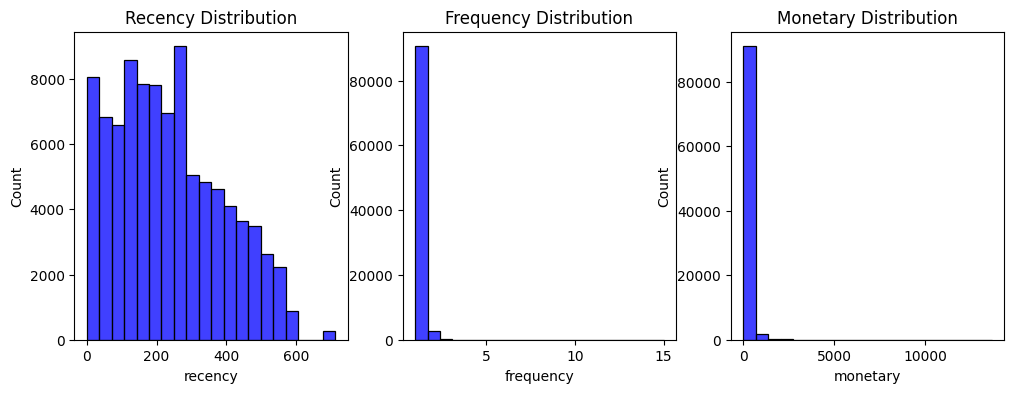

In [58]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
sns.histplot(for_model_df['recency'], color='b', bins=20, ax=ax[0]).set(title='Recency Distribution')
sns.histplot(for_model_df['frequency'], color='b', bins=20, ax=ax[1]).set(title='Frequency Distribution')
sns.histplot(for_model_df['monetary'], color='b', bins=20, ax=ax[2]).set(title='Monetary Distribution')

As shown by histogram above, we can see that none of our data has normal distribution. We will scale the data using MinMaxScaler later.

In [59]:
for_model_df.segment.value_counts()

segment
Regular           35927
New Customers     34522
Hibernating       21574
Potential           747
At Risk             545
Loyalist             38
Core Customers        5
Name: count, dtype: int64

In [60]:
label_map = {
    'Core Customers': 0,
    'Loyalist': 1,
    'Potential': 2,
    'New Customers': 3,
    'At Risk': 4,
    'Hibernating': 5,
    'Regular': 6
}
rev_label_map = {v: k for k, v in label_map.items()}

In [61]:
from sklearn.model_selection import train_test_split

X = for_model_df.drop('segment', axis=1)
y = for_model_df.segment.apply(lambda x: label_map[x])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.35, random_state=69)

In [62]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [63]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [64]:
# from imblearn.under_sampling import EditedNearestNeighbours
# from imblearn.combine import SMOTEENN

# enn = EditedNearestNeighbours()
# imputer = SMOTEENN(sampling_strategy='all', random_state=42, enn=enn)

In [65]:
# X_train, y_train = imputer.fit_resample(X_train, y_train)

### Create Model

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

#### Cross Validation

**Naive Bayes**

In [67]:
mnb = MultinomialNB()
cv = cross_val_score(mnb,X_train,y_train,cv=3)
print("CV: " + str(cv))
print("CV Mean: " + str(cv.mean()))

CV: [0.39188254 0.38923221 0.38982548]
CV Mean: 0.39031341140490344


**Decision Tree**

In [68]:
dt = DecisionTreeClassifier(random_state = 1, class_weight='balanced')
cv = cross_val_score(dt,X_train,y_train,cv=3)
print("CV: " + str(cv))
print("CV Mean: " + str(cv.mean()))

CV: [1.         0.99995056 0.99995056]
CV Mean: 0.9999670407541075


**Logistic Regression**

In [69]:
lr = LogisticRegression(random_state = 1, multi_class='multinomial', class_weight='balanced', solver='newton-cg')
cv = cross_val_score(lr,X_train,y_train,cv=3)
print("CV: " + str(cv))
print("CV Mean: " + str(cv.mean()))

/home/aihazairin/.virtualenvs/perqaraenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/aihazairin/.virtualenvs/perqaraenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/aihazairin/.virtualenvs/perqaraenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


CV: [0.9717718  0.97458842 0.97473674]
CV Mean: 0.9736989869678899


**SVM**

In [70]:
svc = SVC(probability = True, random_state=1, class_weight='balanced')
cv = cross_val_score(svc,X_train,y_train,cv=3)
print("CV: " + str(cv))
print("CV Mean: " + str(cv.mean()))

CV: [0.98185683 0.98235032 0.98210313]
CV Mean: 0.9821034284729633


**Random Forest**

In [71]:
rf1 = RandomForestClassifier(random_state = 1, class_weight='balanced')
cv = cross_val_score(rf1,X_train,y_train,cv=3)
print("CV: " + str(cv))
print("CV Mean: " + str(cv.mean()))

CV: [0.99995056 0.99995056 0.99995056]
CV Mean: 0.999950561945855


In [72]:
rf2 = RandomForestClassifier(random_state = 1, class_weight='balanced_subsample')
cv = cross_val_score(rf2,X_train,y_train,cv=3)
print("CV: " + str(cv))
print("CV Mean: " + str(cv.mean()))

CV: [0.99990113 0.99995056 0.99990112]
CV Mean: 0.9999176035146563


**KNN**

In [73]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=3)
print("CV: " + str(cv))
print("CV Mean: " + str(cv.mean()))

CV: [0.99757762 0.99797301 0.99767637]
CV Mean: 0.9977423315763553


#### Performance on Test Set

**SVM**

In [74]:
svc.fit(X_train, y_train)
y_svc_pred = svc.predict(X_test)

In [75]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_svc_pred))

              precision    recall  f1-score   support

           0       0.13      1.00      0.24         2
           1       0.13      0.47      0.20        17
           2       0.28      0.87      0.43       229
           3       1.00      0.97      0.99     12083
           4       0.92      0.96      0.94       195
           5       0.93      1.00      0.96      7539
           6       0.97      0.91      0.94     12611

    accuracy                           0.95     32676
   macro avg       0.62      0.88      0.67     32676
weighted avg       0.97      0.95      0.96     32676



**Multinomial Logistic Regression**

In [82]:
lr.fit(X_train, y_train)
y_lr_pred = dt.predict(X_test)
print(classification_report(y_test, y_lr_pred))

/home/aihazairin/.virtualenvs/perqaraenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.11      1.00      0.20         2
           1       0.17      0.47      0.25        17
           2       0.42      0.86      0.57       229
           3       1.00      0.98      0.99     12083
           4       0.92      1.00      0.96       195
           5       0.94      1.00      0.97      7539
           6       0.98      0.94      0.96     12611

    accuracy                           0.97     32676
   macro avg       0.65      0.89      0.70     32676
weighted avg       0.97      0.97      0.97     32676



**Decision Tree**

In [76]:
dt.fit(X_train, y_train)
y_dt_pred = dt.predict(X_test)
print(classification_report(y_test, y_dt_pred))

              precision    recall  f1-score   support

           0       0.11      1.00      0.20         2
           1       0.17      0.47      0.25        17
           2       0.42      0.86      0.57       229
           3       1.00      0.98      0.99     12083
           4       0.92      1.00      0.96       195
           5       0.94      1.00      0.97      7539
           6       0.98      0.94      0.96     12611

    accuracy                           0.97     32676
   macro avg       0.65      0.89      0.70     32676
weighted avg       0.97      0.97      0.97     32676



**Random Forest**

In [77]:
rf1.fit(X_train, y_train)
y_rf1_pred = rf1.predict(X_test)
print(classification_report(y_test, y_rf1_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.25      0.94      0.40        17
           2       0.42      0.86      0.57       229
           3       1.00      0.98      0.99     12083
           4       0.92      1.00      0.96       195
           5       0.94      1.00      0.97      7539
           6       0.98      0.94      0.96     12611

    accuracy                           0.97     32676
   macro avg       0.74      0.96      0.81     32676
weighted avg       0.97      0.97      0.97     32676



In [78]:
rf2.fit(X_train, y_train)
y_rf2_pred = rf2.predict(X_test)
print(classification_report(y_test, y_rf2_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.23      1.00      0.38        17
           2       0.42      0.86      0.57       229
           3       1.00      0.98      0.99     12083
           4       0.92      0.96      0.94       195
           5       0.94      1.00      0.97      7539
           6       0.98      0.94      0.96     12611

    accuracy                           0.97     32676
   macro avg       0.78      0.89      0.78     32676
weighted avg       0.97      0.97      0.97     32676



**KNN**

In [79]:
knn.fit(X_train, y_train)
y_knn_pred = knn.predict(X_test)
print(classification_report(y_test, y_knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.28      1.00      0.44        17
           2       0.42      0.88      0.57       229
           3       1.00      0.97      0.99     12083
           4       0.94      0.96      0.95       195
           5       0.94      1.00      0.97      7539
           6       0.97      0.94      0.96     12611

    accuracy                           0.97     32676
   macro avg       0.79      0.96      0.84     32676
weighted avg       0.97      0.97      0.97     32676



**XGBoost**

In [80]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_xgb_pred = xgb.predict(X_test)
print(classification_report(y_test, y_xgb_pred))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       0.25      0.82      0.38        17
           2       0.43      0.87      0.57       229
           3       1.00      0.98      0.99     12083
           4       0.93      1.00      0.97       195
           5       0.94      1.00      0.97      7539
           6       0.98      0.94      0.96     12611

    accuracy                           0.97     32676
   macro avg       0.69      0.94      0.76     32676
weighted avg       0.97      0.97      0.97     32676



**Voting Classifier**

In [83]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(
    estimators=[('svc', svc), ('lr', lr), ('dt', dt), ('rf1', rf1), ('rf2', rf2), ('knn', knn), ('xgb', xgb)],
    voting='soft'
)
vc.fit(X_train, y_train)
y_vc_pred = vc.predict(X_test)
print(classification_report(y_test, y_vc_pred))

/home/aihazairin/.virtualenvs/perqaraenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       0.23      0.82      0.36        17
           2       0.42      0.86      0.57       229
           3       1.00      0.98      0.99     12083
           4       0.92      1.00      0.96       195
           5       0.94      1.00      0.97      7539
           6       0.98      0.94      0.96     12611

    accuracy                           0.97     32676
   macro avg       0.69      0.94      0.76     32676
weighted avg       0.97      0.97      0.97     32676



### Save The Model

In [84]:
import joblib

# we will save the VotingClassifier model
joblib.dump(vc, 'model.pkl')

['model.pkl']